Import librairies

In [1]:
import sys
sys.path.insert(0, "../Classifier")
import importTS
import LearningClassifier
import lime_timeseries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt

Using Theano backend.


Import des séries temporelles d'entrainements et de tests

In [2]:
X_train, Y_train, X_test, Y_test = importTS.dataImport("TwoPatterns")

Construction des classifieurs 1NN et LearningShapelet

In [3]:
cl = LearningClassifier.NN1_Classifier(X_train, Y_train)

Paramètrages : 
- myTs : ST à expliquer
- num_cuts : nombre de coupe dans la série temporelle
- num_features : nombre de sous séries temporelle significatives
- num_samples : nombre de voisins



In [4]:
index  = 0 
num_cuts = 27
num_features = 10
num_samples = 1000
myTs = X_test[index].ravel()

Création de l'explication

In [5]:
myTSexp=lime_timeseries.TSExplainer()
exp = myTSexp.explain_instance(myTs,cl,X_train, num_cuts, num_features, num_samples)

Affichage du résultat : 
- Liste des poids (numéro de la sous-série, poids)
- Graphique

[(20, 0.2695211814765353), (15, 0.26291234586296464), (18, 0.25221330738491765), (16, 0.19696322310911704), (19, 0.08152687741041448), (8, -0.06784755249108475), (12, -0.0653411023126917), (17, 0.06187922270047791), (10, 0.06132784308467147), (22, 0.050350933472395734)]
[(20, 0.2695211814765353), (15, 0.26291234586296464), (18, 0.25221330738491765), (16, 0.19696322310911704), (19, 0.08152687741041448), (8, -0.06784755249108475), (12, -0.0653411023126917), (17, 0.06187922270047791), (10, 0.06132784308467147), (22, 0.050350933472395734)]


(<matplotlib.backends.backend_qt5agg.FigureCanvasQTAgg at 0x1218404c8>,
 <Figure size 864x576 with 1 Axes>)

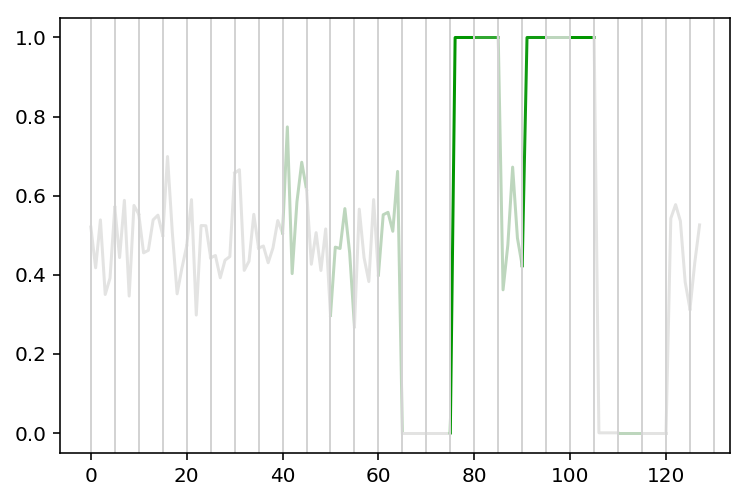

In [6]:
print(exp.as_list())
exp.domain_mapper.as_pyplot(exp, myTs, num_cuts)